In [3]:
%load_ext autoreload
%autoreload 2

In [1]:
import torch
torch.finfo(torch.float16).eps

0.0009765625

In [19]:
torch.tensor(1e-6, dtype=torch.float16).cuda()

tensor(1.0133e-06, device='cuda:0', dtype=torch.float16)

In [4]:
import sys
sys.path.append("../../")

In [8]:
from omegaconf import OmegaConf
from torchganime.models.vqgan import VQGAN
from torchganime.data.image import ImageData
import torchvision
from torchvision.transforms import functional as F

In [17]:
saved_model_path = "/TorchGANime/lightning_logs/version_13"
config = OmegaConf.load(f"{saved_model_path}/config.yaml")

In [18]:
# model = VQGAN(**config, ckpt_path="../../lightning_logs/version_13/checkpoints/epoch=999-step=300000.ckpt")
model = VQGAN.load_from_checkpoint(f"{saved_model_path}/checkpoints/epoch=999-step=300000.ckpt")

Working with z of shape (1, 256, 32, 32) = 262144 dimensions.
loaded pretrained LPIPS loss from /TorchGANime/torchganime/models/lpips/vgg.pth
VQLPIPSWithDiscriminator running with hinge loss.


In [33]:
config["data"]["batch_size"] = 8
dataset = ImageData(**config.data)

In [34]:
for data in dataset.train_dataloader():
    print(data.shape)
    break

torch.Size([8, 3, 128, 256])


In [35]:
prediction = model(data)

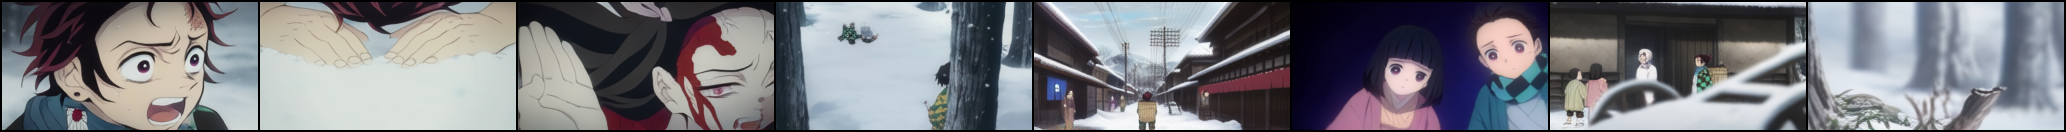

In [36]:

grid_real = torchvision.utils.make_grid(
            prediction[0], normalize=True, value_range=(-1, 1)
        )
F.to_pil_image(grid_real)